## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


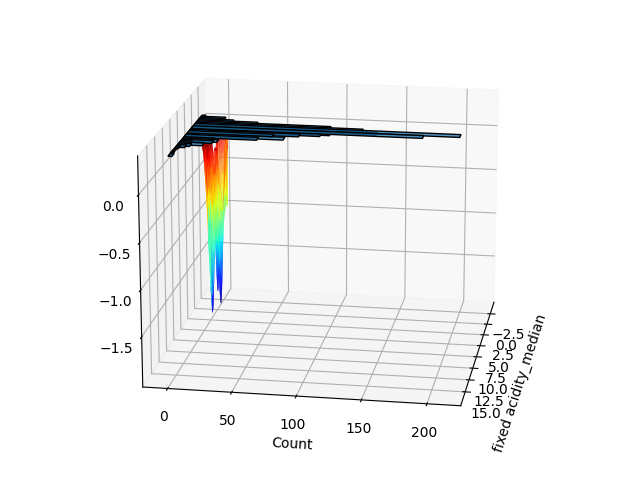

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
df = pd.read_csv('data/P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [3]:
df

,Unnamed: 0,x,y,z,z_pred
0,0,3.325447,-0.869890,-0.048580,-0.063702
1,1,0.199415,-1.064081,-0.865777,-0.883839
2,2,0.623499,1.176377,-0.796616,-0.760264
3,3,0.294015,-0.907471,-0.734876,-0.747532
4,4,-0.613311,-2.226039,-1.179802,-1.155625
...,...,...,...,...,...
1494,1494,-2.239913,0.875061,-0.336937,-0.325980
1495,1495,-0.990434,0.367857,-1.009842,-1.013032
1496,1496,-0.890459,0.319588,-1.091176,-1.072742
1497,1497,1.925576,0.162451,-0.063575,-0.056576


In [9]:
X = df['x'].to_numpy()
Y = df['y'].to_numpy()
Z = df['z'].to_numpy()

In [12]:
import numpy as np
x_std = np.std(X)
y_std = np.std(Y)

In [14]:
import math
def gaussian_func(A , a , b):
    x_term = (x-a)**2 / (2 * x_std)
    y_term = (y-b)**2 / (2 * y_std)
    res = A * math.exp(-(x_term + y_term))
    return res    

1.6309857542685489

In [24]:
# provided function:
import math
def z(x,y):
    term_1 = (x+2)**2 + (y+1)**2
    term_2 = (x-2.75)**2 + (y-2)**2
    term_3 = (x+0.5)**2
    term_4 = (y-2)**2
    term_5 = (x-2)**2 + (y+2)**2
    res = -1 * ((math.exp(-1*term_1) + math.exp(-1*term_2) + math.exp(-1*term_3) + math.exp(-1*term_4) + math.exp(-1*term_5)))
    return res    

In [6]:
# partial derivative with respect to x
import math
def dx(x , y):
    term_1 = -x**2 + 5.5*x + 4*y - y**2 - 11.5625
    term_2 = -x**2 -4*x -y**2 -2*y - 5
    term_3 = -x**2+4*x-y**2-4*y-8
    term_4 = -x**2-x-0.25
    res = math.exp(term_1)*(-2*x+5.5) + math.exp(term_2)*(-2*x-4) + math.exp(term_3)*(-2*x+4) + math.exp(term_4)*(-2*x-1)
    return res

In [8]:
# partial derivative with respect to y
import math
def dy(x , y):
    term_1 = -x**2 + 5.5*x + 4*y - y**2 - 11.5625
    term_2 = -x**2 -4*x -y**2 -2*y - 5
    term_3 = -x**2+4*x-y**2-4*y-8
    term_4 = -y**2+4*y-4
    res = math.exp(term_1)*(-2*y+4) + math.exp(term_2)*(-2*y-2) + math.exp(term_3)*(-2*y-4) + math.exp(term_4)*(-2*y+4)
    return res

In [9]:
dy(2 , 3)

-1.1549816567840612

In [15]:
def my_GradientDes(x,y,learning_rate,iteration):
    x_curr = x
    y_curr = y
    for i in range(iteration):
        new_x = x_curr - learning_rate*dx(x_curr , y_curr)
        new_y = y_curr - learning_rate*dy(x_curr , y_curr)
        x_curr , y_curr = new_x , new_y
        
    optimum = z(x_curr , y_curr)
    return (x_curr , y_curr , optimum)

In [21]:
x, y , opt = my_GradientDes(4 , 4, 0.01 , 10000)
print(x)
print(y)
print(opt)

4.073117675432646
4.851438665914479
-0.000345481762218852


In [25]:
starting_points = [(-4,-4) , (-4,-2) , (-3,0) , (-4,-1)]
learning_rates = [0.01 , 0.05 , 0.1 , 1]
iterations = [1000 , 10000 , 1000000]

for point in starting_points:
    for rate in learning_rates:
        for iters in iterations:
            i_x , i_y = point
            x , y , optimum = my_GradientDes(i_x , i_y , rate , iters)
            print(f'Stating point ({i_x},{i_y}), rate: {rate} , iterations: {iters} , end:({x},{y},{optimum})')


Stating point (-4,-4), rate: 0.01 , iterations: 1000 , end:(-4.000424790587419,-4.000135452717603,-7.025567365919849e-06)
Stating point (-4,-4), rate: 0.01 , iterations: 10000 , end:(-4.004196493299046,-4.001339722218024,-6.85138132665999e-06)
Stating point (-4,-4), rate: 0.01 , iterations: 1000000 , end:(-4.202595609431996,-4.068351847584982,-1.749333388693675e-06)
Stating point (-4,-4), rate: 0.05 , iterations: 1000 , end:(-4.002112438952105,-4.00067394998743,-6.9471138334643516e-06)
Stating point (-4,-4), rate: 0.05 , iterations: 10000 , end:(-4.019930511335473,-4.006393985482418,-6.1680456608867055e-06)
Stating point (-4,-4), rate: 0.05 , iterations: 1000000 , end:(-4.403322267576318,-4.1420501126762845,-4.015587675967032e-07)
Stating point (-4,-4), rate: 0.1 , iterations: 1000 , end:(-4.004196543672822,-4.001339736735525,-6.851379048915738e-06)
Stating point (-4,-4), rate: 0.1 , iterations: 10000 , end:(-4.037579400587322,-4.01212102592666,-5.47875064421555e-06)
Stating point (-4,

Answer the result here:
From the diagram, there are a total of 4 local minima and minimum of these four points will be the global minimum.
Starting at point (-4,-4), as the learning rates and number of iterations are increased, higher minimum points are returned. This indicates the actual minima might be very close to (-4,-4) and the gradient descent might have overshoot past it. So (-4,-4,-7e^-6) can be considered a local minima.
Starting at point (-4,-2), with learning rate 0.05 and 10000 iterations, local minima of -5.69e^-5 is found. With more iterations and higher learning rates, only higher minima could be found, again indicating overshooting beyond the point (-4.80 , -2.40 , -5.69e^-5).
Starting at point (-3,0) minima is found at (-6.08,-2.27,-2.28e^-8)

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('data/winequality-red.csv')
features = df.columns

In [7]:
df.isnull().sum()

fixed acidity            19
volatile acidity         32
citric acid             170
residual sugar           38
chlorides                51
free sulfur dioxide      80
total sulfur dioxide     57
density                  58
pH                       34
sulphates                61
alcohol                  22
quality                   0
dtype: int64

<IPython.core.display.Javascript object>


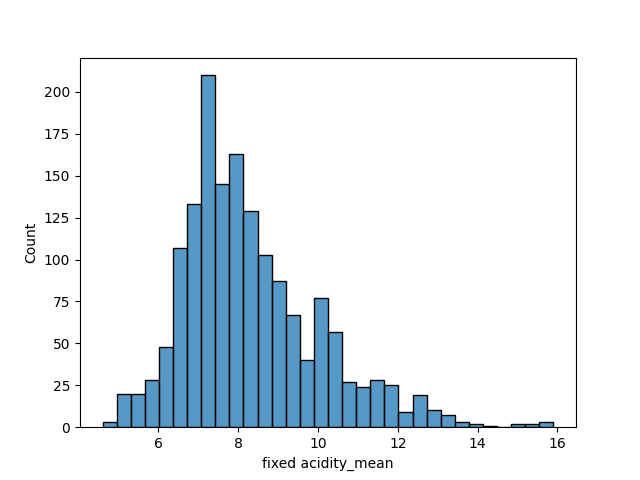

c:\users\dipro\appdata\local\programs\python\python37\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\users\dipro\appdata\local\programs\python\python37\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


<IPython.core.display.Javascript object>


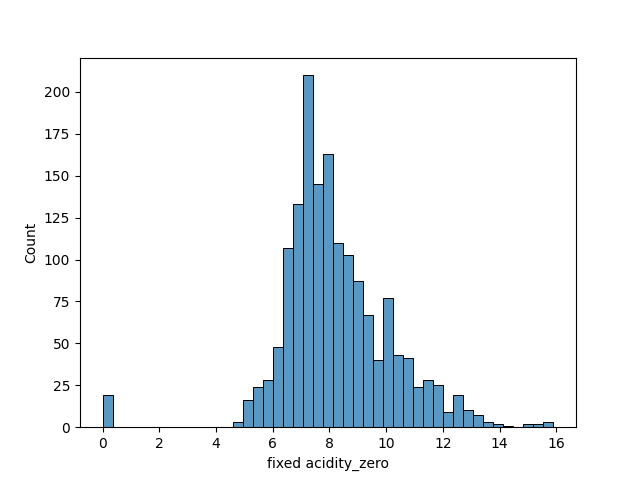

<IPython.core.display.Javascript object>


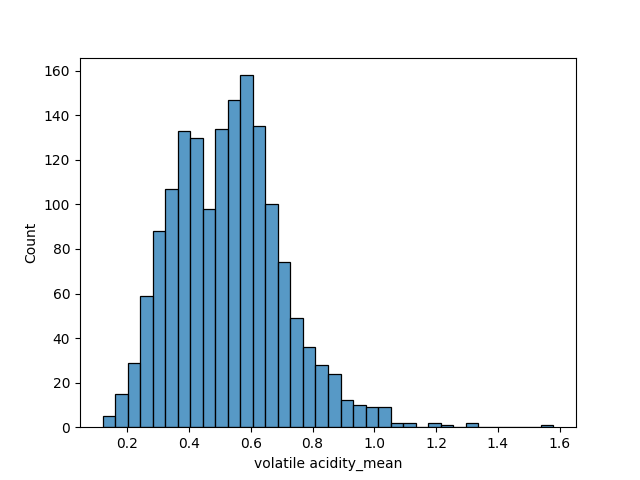

<IPython.core.display.Javascript object>


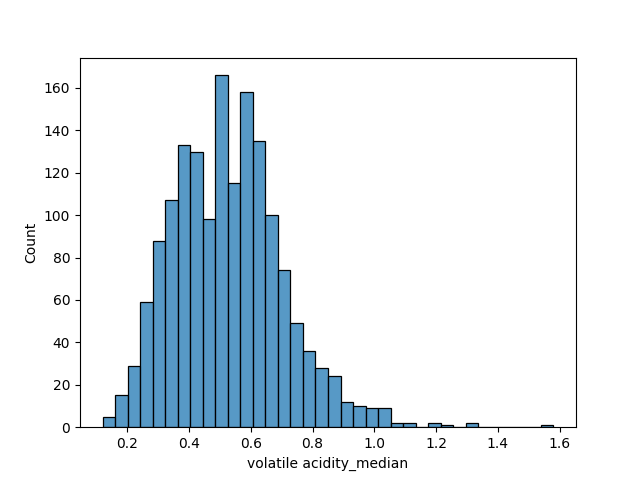

<IPython.core.display.Javascript object>


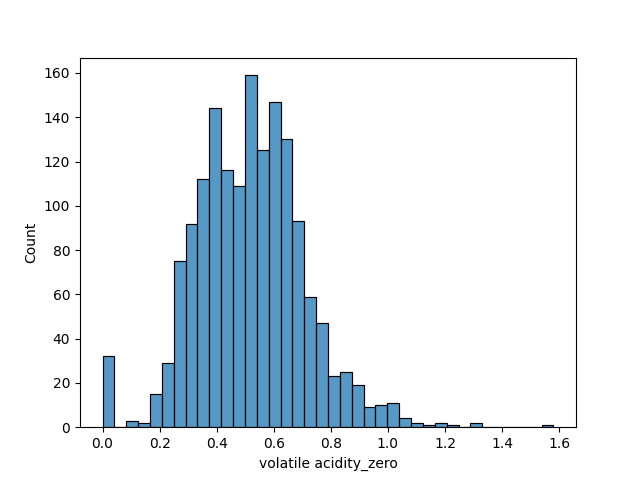

<IPython.core.display.Javascript object>


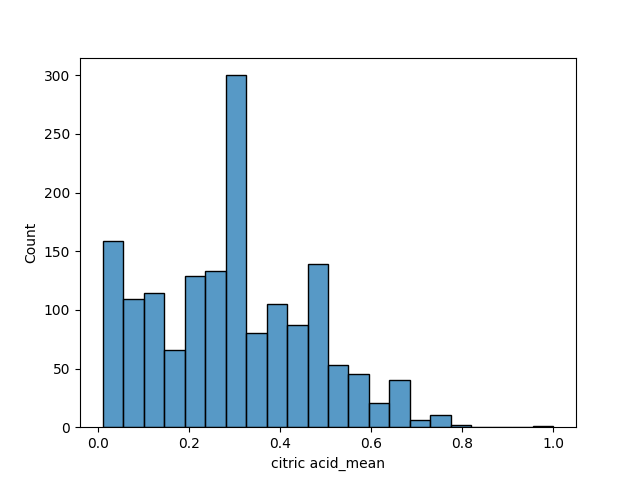

<IPython.core.display.Javascript object>


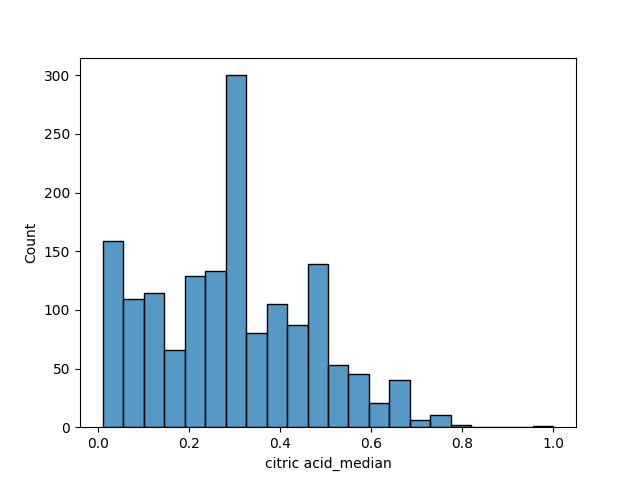

<IPython.core.display.Javascript object>


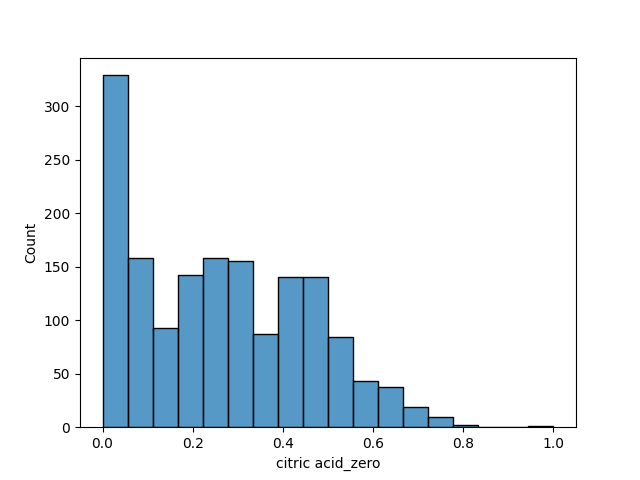

<IPython.core.display.Javascript object>


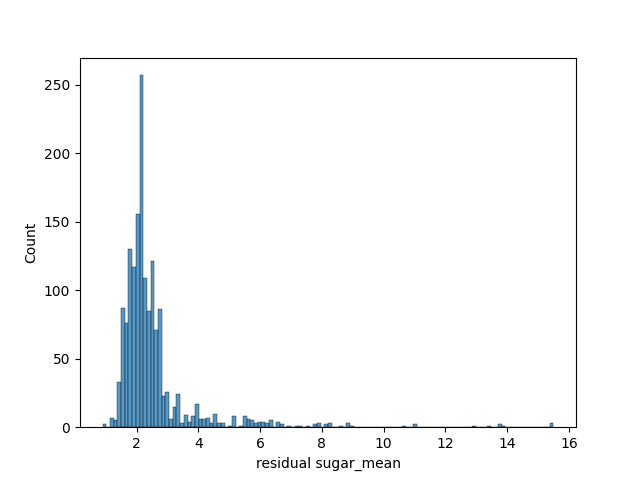

<IPython.core.display.Javascript object>


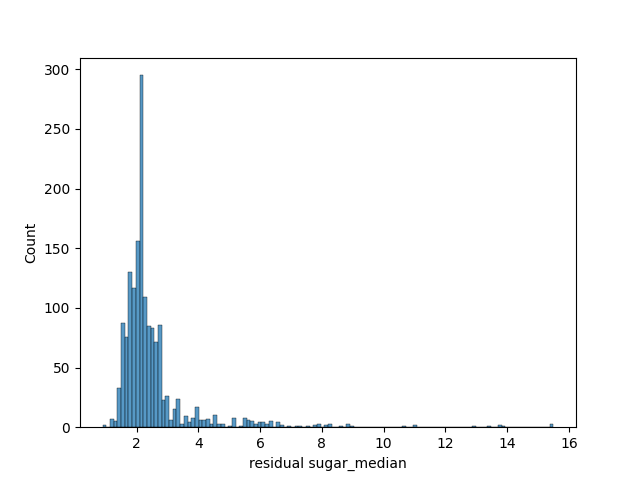

<IPython.core.display.Javascript object>


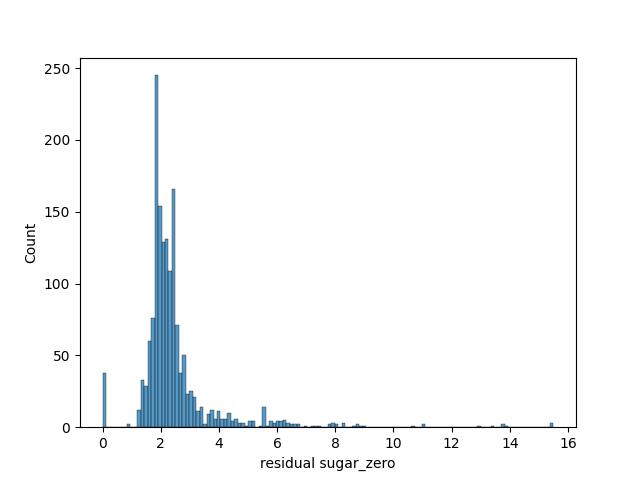

<IPython.core.display.Javascript object>


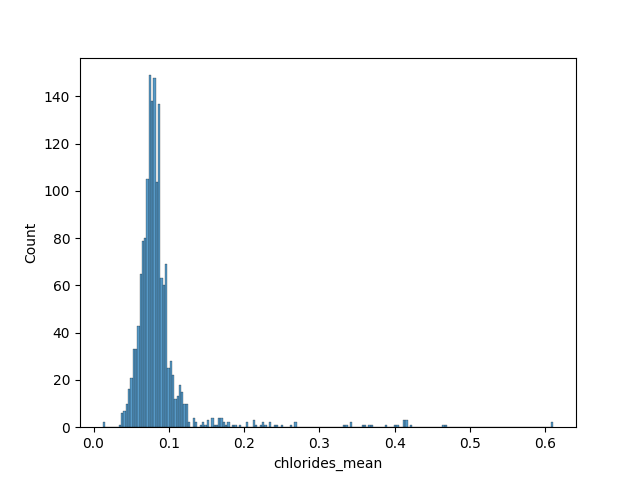

<IPython.core.display.Javascript object>


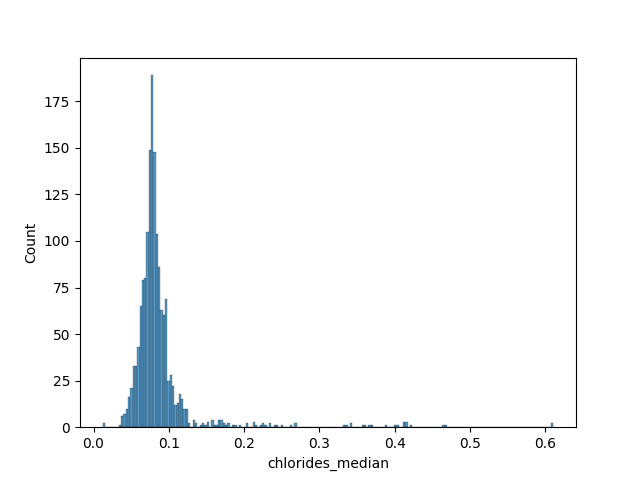

<IPython.core.display.Javascript object>


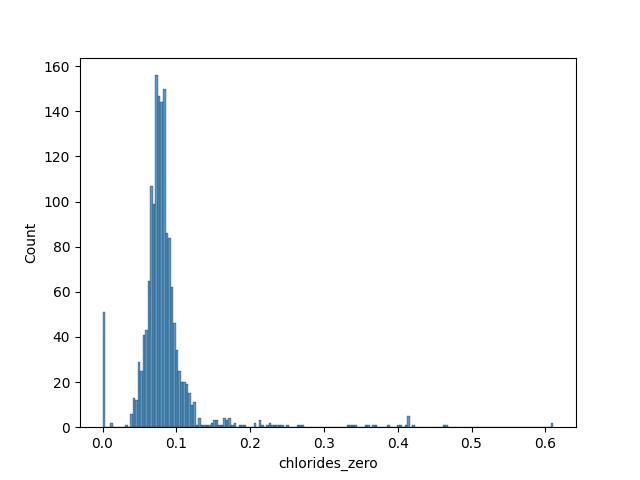

<IPython.core.display.Javascript object>


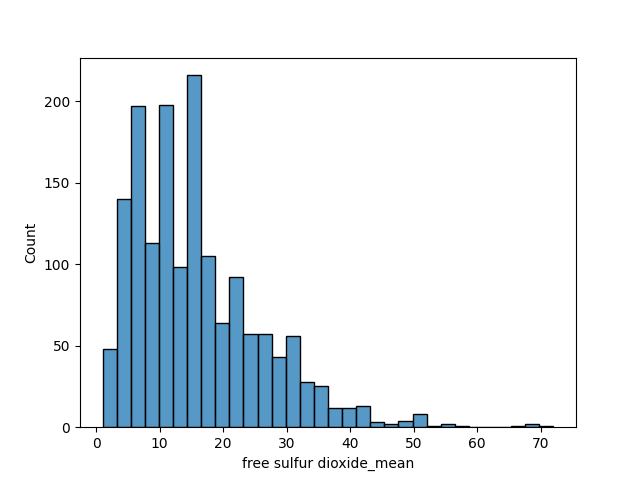

<IPython.core.display.Javascript object>


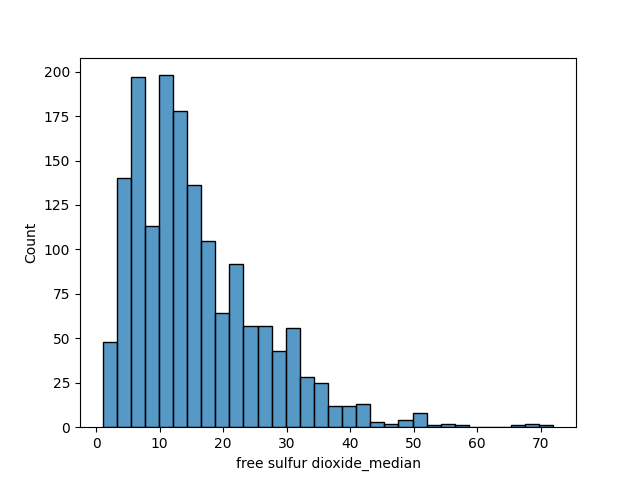

<IPython.core.display.Javascript object>


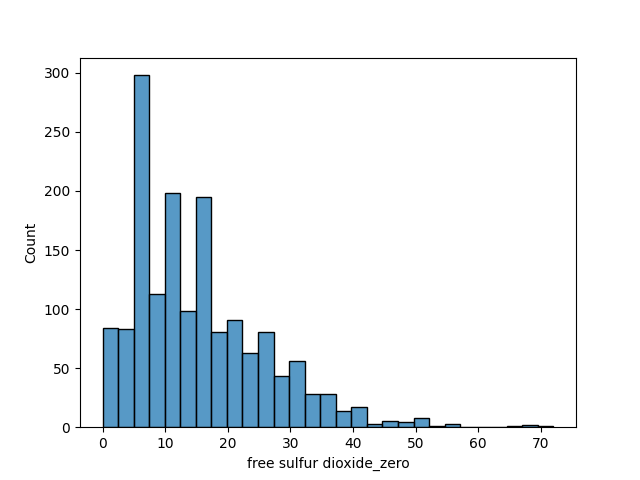

<IPython.core.display.Javascript object>


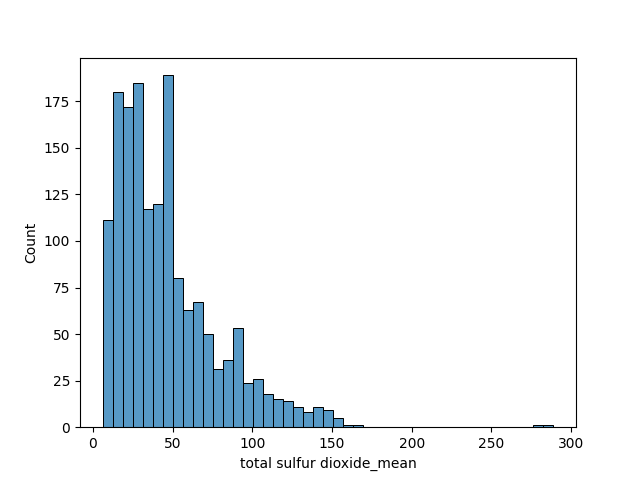

<IPython.core.display.Javascript object>


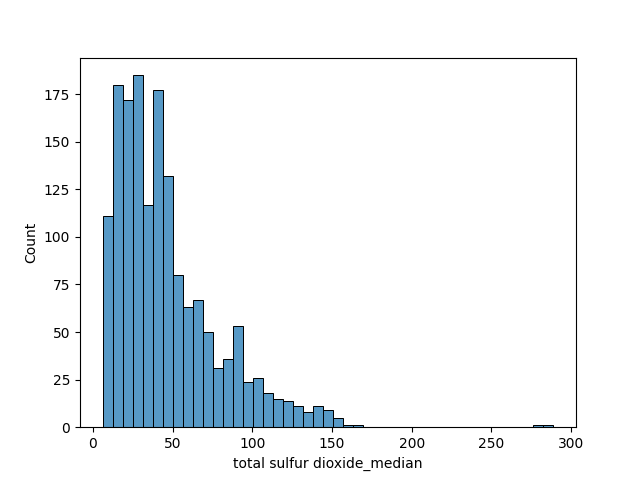

<IPython.core.display.Javascript object>


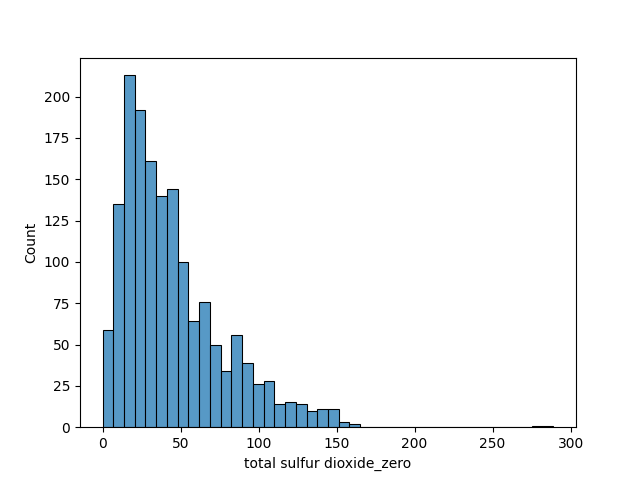

<IPython.core.display.Javascript object>


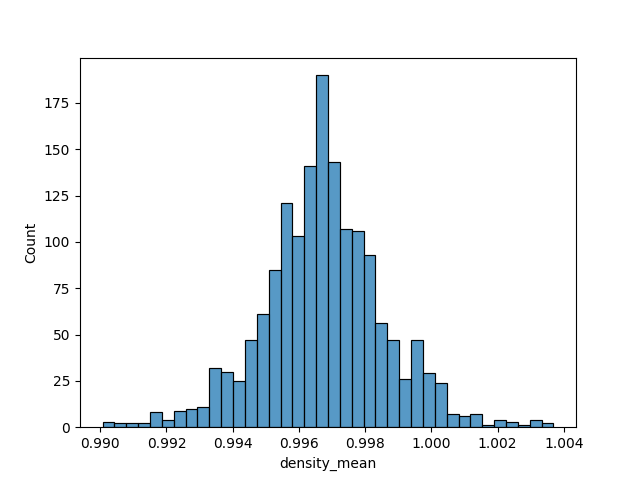

<IPython.core.display.Javascript object>


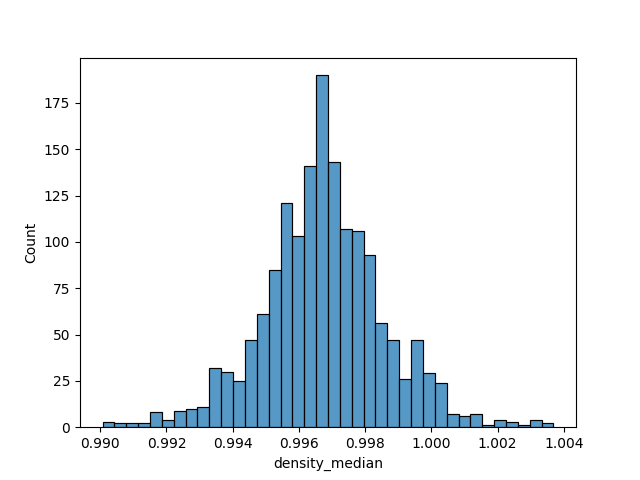

<IPython.core.display.Javascript object>


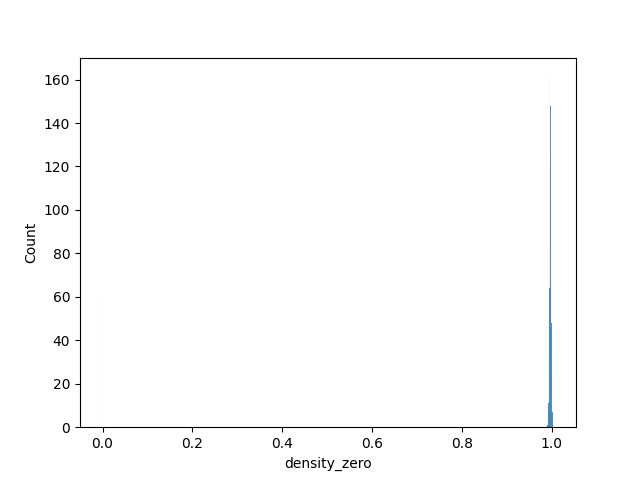

<IPython.core.display.Javascript object>


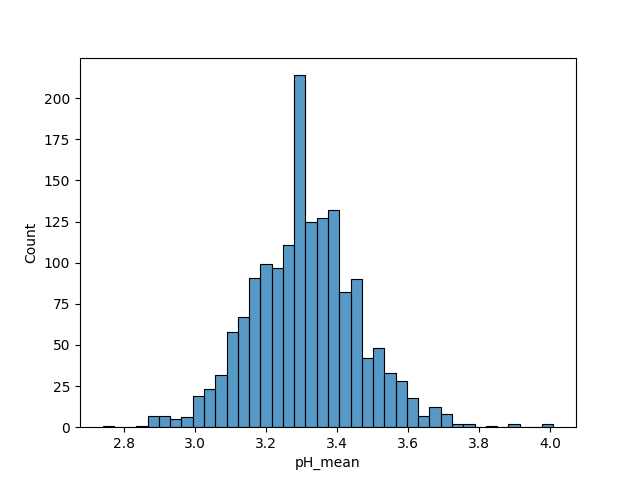

<IPython.core.display.Javascript object>


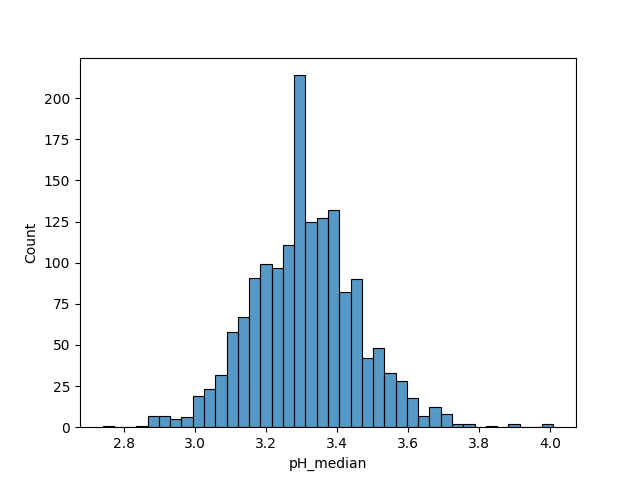

<IPython.core.display.Javascript object>


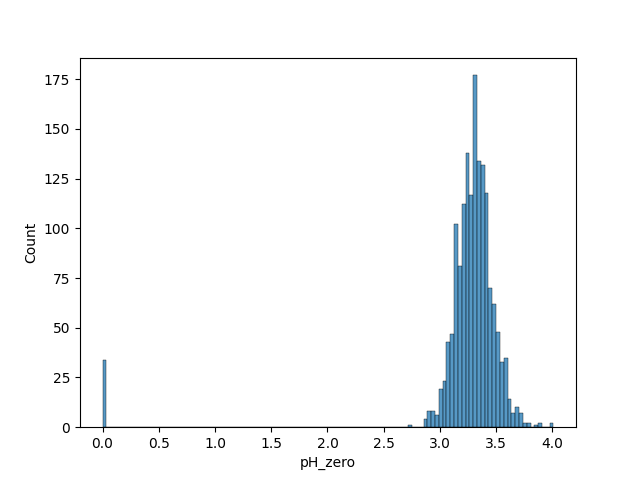

<IPython.core.display.Javascript object>


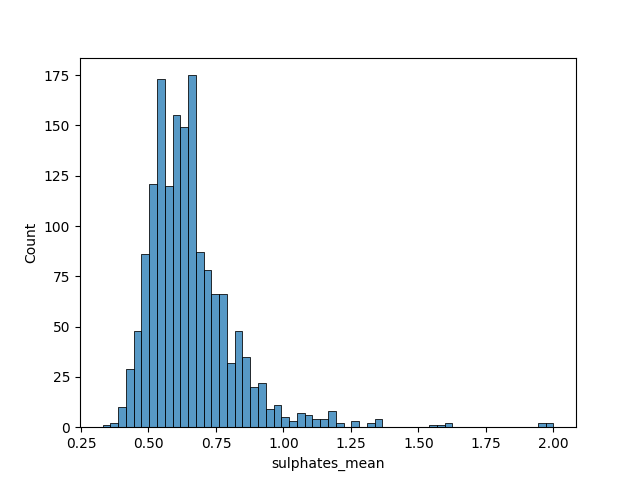

<IPython.core.display.Javascript object>


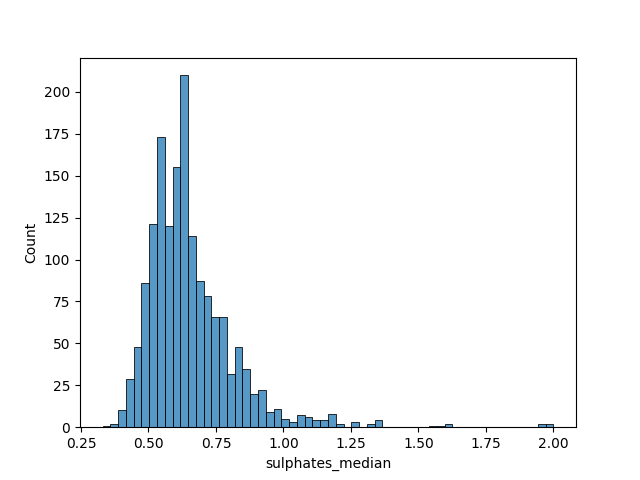

<IPython.core.display.Javascript object>


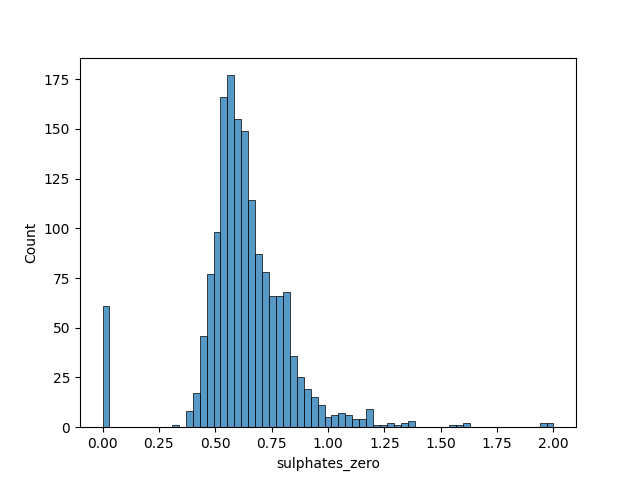

<IPython.core.display.Javascript object>


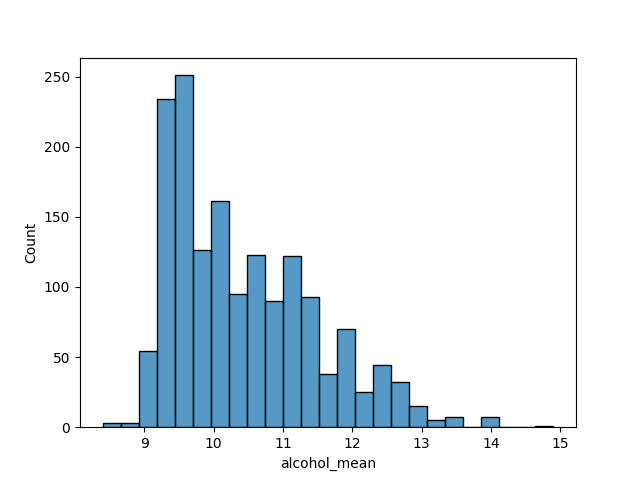

<IPython.core.display.Javascript object>


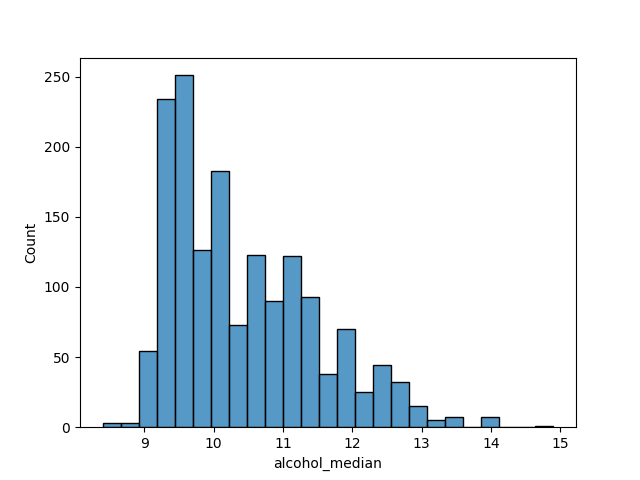

<IPython.core.display.Javascript object>


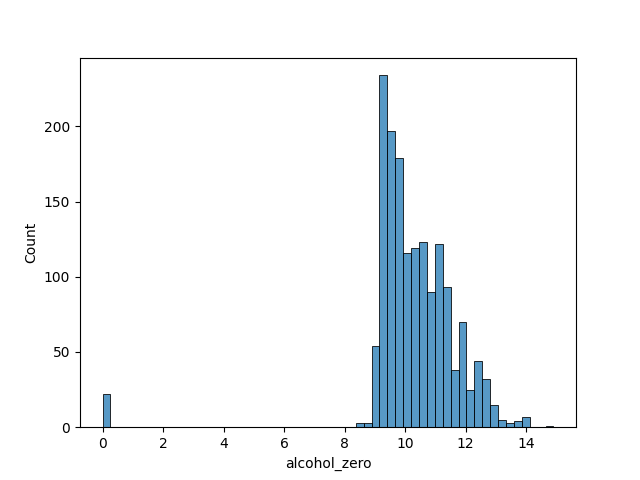

<IPython.core.display.Javascript object>


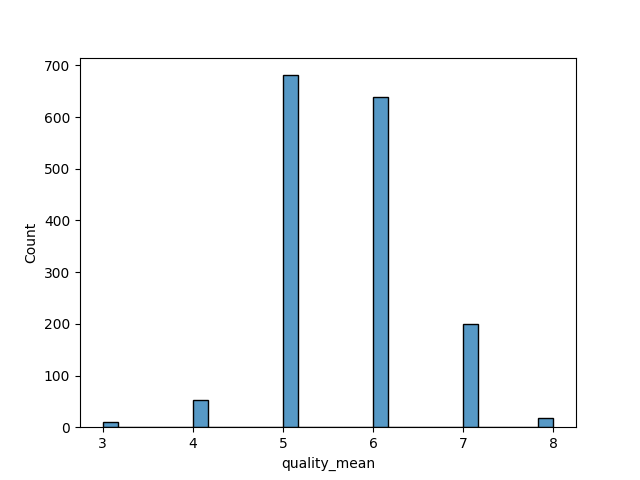

<IPython.core.display.Javascript object>


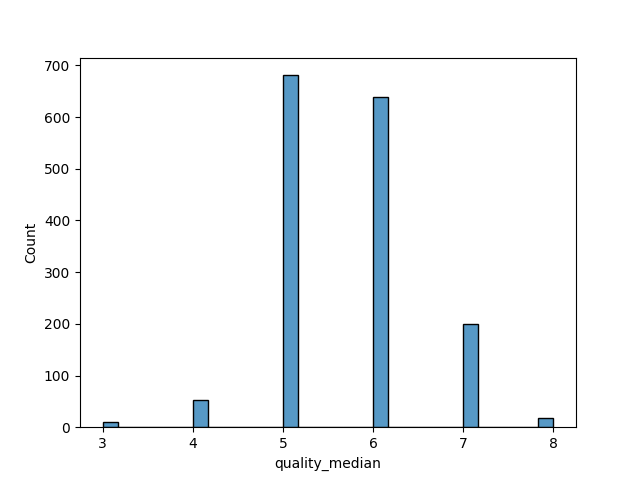

<IPython.core.display.Javascript object>


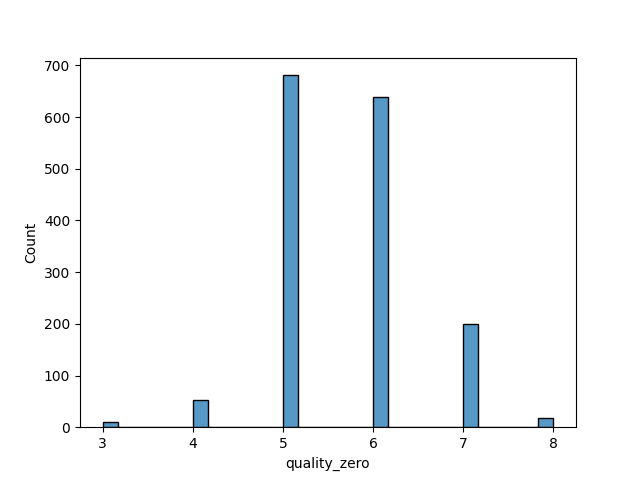

In [30]:
mpl.rcParams['figure.max_open_warning'] = 40
for i , feature in enumerate(features):
    plt.figure((3*i))
    df[f'{feature}_mean'] = df[feature]
    df[f'{feature}_mean'] = df[feature].fillna(df[feature].mean())
    sns.histplot(data = df , x = f'{feature}_mean')
    plt.figure((3*i+1))
    df[f'{feature}_median'] = df[feature]
    df[f'{feature}_median'] = df[feature].fillna(df[feature].median())
    sns.histplot(data = df , x = f'{feature}_median')
    plt.figure((3*i+2))
    df[f'{feature}_zero'] = df[feature]
    df[f'{feature}_zero'] = df[feature].fillna(0)
    sns.histplot(data = df , x = f'{feature}_zero')

In [31]:
import numpy as np
split = (3+8)/2
df['quality_binary'] = np.where(df.quality >= split , 1 , 0)

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

In [26]:
import numpy as np
from scipy import stats

def eucledian_distance(x1 , x2):
    return np.sqrt(np.sum((x1-x2)**2))

class my_KNN:
    
    def __init__(self , k):
        self.k = k
        
    def fit(self, X , y):
        self.X_train = X
        self.y_train = y
    
    def predict(self , X):
        predicted_labels = [self.single_pred(x) for x in X]
        return np.array(predicted_labels)
    
    def single_pred(self, x):
        
        # compute distances to each training point
        distances = [eucledian_distance(x, x_train) for x_train in self.X_train]
        
        # retrieve k samples with smallest indices
        k_indices = np.argsort(distances)[:self.k] 
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # majority vote
        #most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        labels_freq = stats.mode(k_nearest_labels)
        highest_freq = labels_freq.mode[0]
        return highest_freq

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

In [62]:
import numpy as np

class my_LDA:
    
    def __init__(self , num_comp):
        self.num_comp = num_comp
        self.linear_discriminants = None
        
    def fit(self , X , y):
        '''
        X : features matrix
        y : labels
        '''
        num_features = X.shape[1]
        class_labels = np.unique(y)
        
        mean_overall = np.mean(X , axis = 0)
        
        # S_W -- within class scatter
        # S_B -- betweeen class scatter
        
        S_W = np.zeros((num_features , num_features))
        S_B = np.zeros((num_features , num_features))
        
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c , axis = 0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            
            num_samples = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(num_features , 1)
            S_B += num_samples * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues , eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1] # decreasing order
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.linear_discriminants = eigenvectors[0 : self.num_comp]
        
        
    
    def transform(self , X):
        # project data
        return np.dot(X , self.linear_discriminants.T)
        

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

In [121]:
import numpy as np

class my_LogisticRegression:
    
    def __init__(self, learning_rate, num_iter):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        
    def fit(self , X , y):
        '''
        X : features matrix
        y : labels array
        '''
        num_samples , num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.num_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            #print(self.weights.shape)
            #print(dw.shape)
            #print(dw[0].shape)
            #print(len(dw.T))
            #print((dw.T)[0])
            #print(dw[0])
            self.weights -= (self.learning_rate * (dw.T)[0])
            self.bias -= (self.learning_rate * db)
            
    
    def predict(self , X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self , x):
        return 1 / (1 + np.exp(-x))

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)

In [32]:
# remove redundancies
for feature in features:
    df = df.drop([feature , f'{feature}_median' , f'{feature}_zero'] , axis = 1)

In [33]:
df = df.drop(['quality_mean'] , axis = 1)

In [34]:
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]

In [35]:
X = X.to_numpy()

In [36]:
X.shape

(1599, 11)

In [37]:
y = y.to_numpy()

In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 1234)

In [53]:
X_train.shape

(1279, 11)

In [54]:
y_train.shape

(1279, 1)

In [39]:
clf_KNN = my_KNN(5)
clf_KNN.fit(X_train , y_train)
predictions = clf_KNN.predict(X_test)

In [40]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [41]:
# KNN accuracy
accuracy = accuracy(y_test , predictions)
print(f'Accuracy of my_KNN is : {accuracy}')

Accuracy of my_KNN is : 0.640625
